### An official sample

In [134]:
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy.stats import norm
from pyts.approximation import SymbolicAggregateApproximation

# Parameters
n_samples, n_timestamps = 100, 50

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# X = (X - X.min(axis=1).reshape(-1,1)) / (X.max(axis=1).reshape(-1,1) - X.min(axis=1).reshape(-1,1)) 
X = ts[0:1000].reshape(1, -1)
test_idx = 0

n_samples, n_timestamps = X.shape
# X[0] = (X[0] - X[0].min()) / X[0].max()
# X = ts.reshape(1, -1) 
# SAX transformation
# n_bins = 26
# sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
sax = SymbolicFourierApproximation(n_coefs=5)
X_sax = sax.fit_transform(X)

# Compute gaussian bins
bins = norm.ppf(np.linspace(0, 1, n_bins + 1)[1:-1])

# Show the results for the first time series
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

plt.figure(figsize=(6, 4))
plt.plot(X[test_idx], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[test_idx], X_sax[test_idx], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()

ValueError: 'n_bins' must be greater than or equal to 2 and lower than or equal to min(n_samples, 26) (got 4).

In [114]:
X_sax.shape

(1, 28479)

In [106]:
X_sax[1]

array(['s', 'q', 's', 's', 's', 's', 'q', 'p', 'o', 'r', 'u', 'o', 'u',
       'o', 'q', 'r', 'u', 'q', 't', 'u', 'u', 's', 't', 't', 't', 's',
       'r', 'm', 'q', 's', 'u', 'v', 'r', 'r', 'p', 'u', 'p', 'q', 'r',
       'q', 'u', 't', 'r', 't', 'q', 'u', 't', 'q', 'q', 'r'], dtype='<U1')

In [107]:
X_sax[0]

array(['r', 's', 't', 'q', 't', 'p', 's', 'u', 'p', 'q', 'r', 'q', 'q',
       's', 'p', 'v', 'r', 'v', 'v', 'u', 'n', 'p', 'r', 'o', 'v', 'n',
       't', 'r', 'u', 'p', 'u', 't', 'q', 'u', 'v', 'q', 'r', 'm', 'q',
       'q', 's', 's', 'r', 'q', 'u', 's', 'v', 'u', 'q', 'q'], dtype='<U1')

In [89]:
X[0].max()

1.609714279427906

In [65]:
set(list(X_sax[0]))

{'m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v'}

### SMD dataset testing


In [27]:
import sys
import logging
sys.path.append("../")

In [31]:
from common.dataloader import load_dataset
from common import data_preprocess

In [173]:
dataset = "SMD"
subdataset = "machine-1-1"
data_dict = load_dataset(dataset, subdataset)
normalize = "minmax"
pp = data_preprocess.preprocessor()
data_dict = pp.normalize(data_dict, method=normalize)

Shape of train is (28479, 38).
Shape of test is (28479, 38).
Shape of test_labels is (28479,).


In [174]:
x_train = data_dict["train"]
x_test = data_dict["test"]
x_test_labels = data_dict["test_labels"]

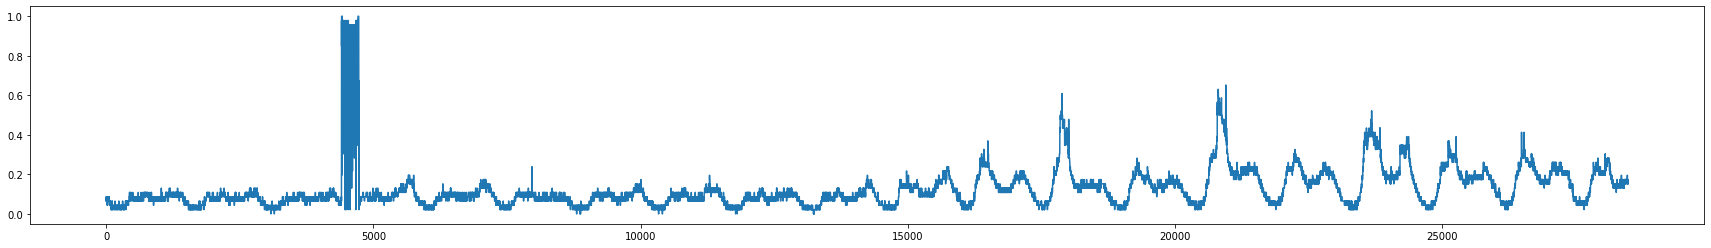

In [203]:
ts = x_train[:,0]
plt.figure(figsize=[30,4])
plt.plot(ts)

In [212]:
ts = x_train[:,0].reshape(1, -1)
transformer = SymbolicAggregateApproximation(n_bins=26)
X_SAX = transformer.fit_transform(ts)

transformer = SymbolicFourierApproximation(n_bins=26)
X_SFA = transformer.fit_transform(ts.reshape(-1, 1))

transformer = MultipleCoefficientBinning(n_bins=26)
X_MCB = transformer.fit_transform(ts.reshape(-1, 1))


/Users/liujinyang/anaconda3/envs/python36/lib/python3.6/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))


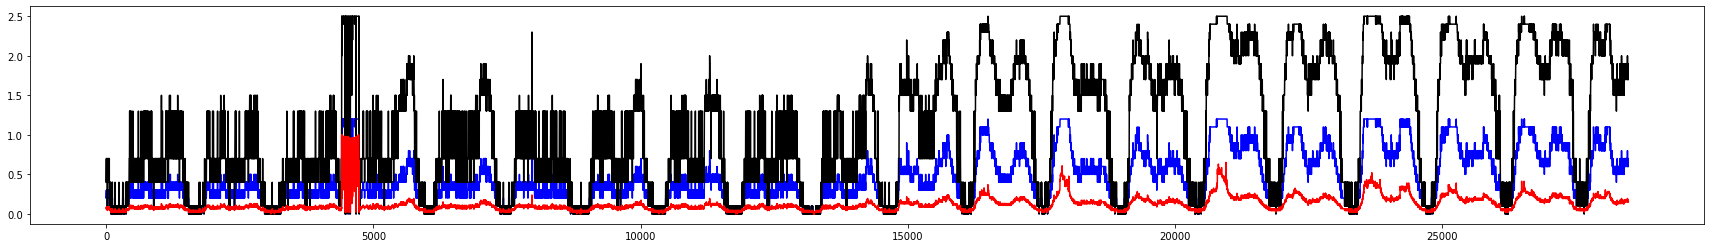

In [227]:
import string
symb_mapping = {ch: idx/10 for idx, ch in enumerate(list(string.ascii_lowercase))}
X_SFA_int = [symb_mapping[ch] for ch in X_SFA.reshape(-1)]
X_SAX_int = [symb_mapping[ch] for ch in X_SAX.reshape(-1)]
X_MCB_int = [symb_mapping[ch] for ch in X_MCB.reshape(-1)]
plt.figure(figsize=[30,4])
plt.plot(X_SAX_int, c="blue")
plt.plot(X_MCB_int, c="black")
# plt.plot(X_SFA_int, c="green")
plt.plot(ts.reshape(-1), c="r")

In [191]:
from pyts.approximation import MultipleCoefficientBinning
n_bins = 26
sax = MultipleCoefficientBinning(n_bins=5)
X_sax = sax.fit_transform(x_train.T)

ValueError: At least two consecutive quantiles are equal. Consider trying with a smaller number of bins or removing timestamps with low variation.

In [164]:
set(X_sax[0])

{'c', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 's', 't', 'u'}

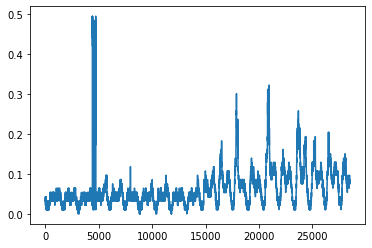

In [169]:
plt.plot(x_train.T[0])

In [77]:
x_train.T.shape

(38, 28479)

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_basic_motions
from pyts.multivariate.transformation import WEASELMUSE
from sklearn.preprocessing import LabelEncoder
from pyts.approximation import SymbolicFourierApproximation
from pyts.datasets import load_gunpoint

X, _, _, _ = load_gunpoint(return_X_y=True)
transformer = SymbolicFourierApproximation(n_bins=10)
X_new = transformer.fit_transform(X)

In [158]:
X[0]

array([-0.6478854 , -0.64199155, -0.63818632, -0.63825875, -0.63834515,
       -0.63869741, -0.64304876, -0.64376789, -0.64504991, -0.64711823,
       -0.64915334, -0.65124584, -0.65729046, -0.66220082, -0.66123227,
       -0.66098661, -0.66156196, -0.66225552, -0.66191228, -0.66274039,
       -0.66093438, -0.66344985, -0.66219448, -0.6623359 , -0.66171176,
       -0.66139185, -0.66140829, -0.66144719, -0.66037322, -0.65910828,
       -0.65974177, -0.65817648, -0.65839527, -0.65734763, -0.65851971,
       -0.6584864 , -0.657366  , -0.65435815, -0.65251819, -0.6513159 ,
       -0.64814481, -0.64733294, -0.64709792, -0.64486153, -0.64360412,
       -0.64349171, -0.64265061, -0.6420974 , -0.64447929, -0.6488921 ,
       -0.65765851, -0.66120325, -0.64966432, -0.61016844, -0.53743483,
       -0.46503123, -0.35853483, -0.28313648, -0.17744604,  0.15824648,
        0.35028455,  0.48241039,  0.60380734,  0.79710411,  0.98755132,
        1.2037853 ,  1.4065415 ,  1.5962459 ,  1.7128307 ,  1.77

In [159]:
X_new[0]

array(['e', 'i', 'i', 'h', 'a', 'd', 'i', 'f', 'h', 'e', 'a', 'g', 'j',
       'e', 'e', 'b', 'e', 'j', 'd', 'c', 'e', 'c', 'g', 'e', 'b', 'j',
       'f', 'a', 'g', 'e', 'f', 'f', 'b', 'c', 'i', 'f', 'a', 'c', 'h',
       'j', 'e', 'a', 'c', 'j', 'j', 'c', 'a', 'a', 'j', 'j', 'a', 'b',
       'h', 'g', 'j', 'd', 'a', 'c', 'i', 'j', 'j', 'a', 'a', 'i', 'j',
       'h', 'a', 'a', 'g', 'j', 'i', 'a', 'a', 'c', 'j', 'j', 'a', 'a',
       'i', 'j', 'i', 'd', 'a', 'b', 'i', 'h', 'a', 'b', 'c', 'j', 'j',
       'c', 'a', 'b', 'i', 'j', 'd', 'a', 'g', 'e', 'h', 'h', 'a', 'd',
       'j', 'c', 'g', 'h', 'a', 'g', 'j', 'b', 'b', 'c', 'a', 'j', 'j',
       'a', 'g', 'b', 'a', 'j', 'j', 'a', 'j', 'a', 'a', 'j', 'a', 'a',
       'j', 'a', 'a', 'j', 'a', 'c', 'j', 'a', 'a', 'j', 'a', 'i', 'j',
       'a', 'a', 'j', 'b', 'j', 'j', 'a'], dtype='<U1')

In [1]:
import torch

In [4]:
indices = torch.Tensor(10,10).random_(1, 24)
# indices.shape => torch.Size([1, 1, 128, 128, 128])
# indices.dtype => torch.float32

n = 24
one_hot = torch.nn.functional.one_hot(indices.to(torch.int64), n)

In [11]:
test = indices[0].numpy()

In [13]:
test

array([ 3., 22., 22., 14., 12.,  4., 23.,  5., 15.,  4.], dtype=float32)

In [16]:
import numpy as np
a = np.zeros(26)

In [19]:
a[test.astype(int)]=1

In [21]:
y = torch.zeros(26)
y_indice = [1,3,4]
# y_indice = list(map(lambda x: self.vocab.label2idx[x], self.windows[idx, -1, :]))
y[y_indice] = 1

In [22]:
y

tensor([0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
mlb = MultiLabelBinarizer()
mlb.fit_transform([test])

array([[1, 1, 1, 1, 1, 1, 1, 1]])

In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# test = pd.Series([['a', 'b', 'e'], ['c', 'a'], ['d'], ['d'], ['e']])


res = pd.DataFrame(,
                   columns=mlb.classes_,
                   index=test.index)

TypeError: 'numpy.float32' object is not iterable

In [1]:
import dgl
import torch

Using backend: pytorch


In [2]:
g = dgl.graph(([0, 1, 2, 3, 4], [1, 2, 3, 4, 0]))  # 5-node cycle
g.edata['w'] = torch.arange(10).view(5, 2)
sg = dgl.in_subgraph(g, [2, 0])

In [3]:
sg.edges()

(tensor([1, 4]), tensor([2, 0]))

In [4]:
sg.nodes()

tensor([0, 1, 2, 3, 4])

In [8]:
dgl.graph(([4,5], [2,4])).in_edges([1, 4])

(tensor([5]), tensor([4]))